In [1]:
import os
import keras
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
#from keras.utils import CustomObjectScope
from keras.initializers import glorot_uniform
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread
import numpy as np
import lime
from lime import lime_image


In [2]:
import numpy as np
import os
import tensorflow as tf
import pandas as pd
from keras import models, optimizers, backend
from keras.layers import core, convolutional, pooling
from sklearn import model_selection
import cv2
import random

from tensorflow.keras.utils import Sequence
import matplotlib.image as mpimg

from PIL import Image
import skimage 
from skimage.transform import resize

from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from sklearn.preprocessing import LabelEncoder


from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
from lime import lime_image

from keras.applications import inception_v3 as inc_net
from keras.applications.imagenet_utils import decode_predictions
from skimage.segmentation import mark_boundaries





In [3]:
image_dataset = r'C:/Users/Ketan/Thesis/self-driving-car/challenges/resized_dataset_udacity_320x240/1479425558653142720.jpg'

In [ ]:
C:\Users\Ketan\Thesis\self-driving-car\challenges

In [4]:
explainer = lime_image.LimeImageExplainer()


In [5]:

with tf.keras.utils.custom_object_scope({'GlorotUniform': glorot_uniform()}):
    model = keras.models.load_model('C:/Users/Ketan/Thesis/self-driving-car/challenges/udacity_classification_custom_model_v3.h5', compile=False)
#     model1 = keras.models.load_model('model_full.h5')
#     model2 = keras.models.load_model('PilotnetKeras_Resized.h5')

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 160, 213, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 80, 107, 16)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 35, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 18, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 6, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 384)               0

In [207]:
model.history

In [211]:
# from keras.utils.vis_utils import plot_model

# plot_model(model, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)

In [73]:
def open_images(inference_folder: str) -> np.ndarray:
    """Loads images from a folder and prepare them for inferencing.

    Parameters
    ----------
    inference_folder : str
        Location of images for inferencing.

    Returns
    -------
    np.ndarray
        List of images as numpy arrays transformed to fit the efficient_net model input specs.
    """
    images = []
    for img in os.listdir(inference_folder):
        img_location = os.path.join(inference_folder, img)  # create full path to image

        with Image.open(img_location) as img:  # open image with pillow

            img = np.array(img)
            img = img[:, :, :3]
            img = np.expand_dims(img, axis=0)  # add 0 dimension to fit input shape of efficient_net
            img = inc_net.preprocess_input(img)

        images.append(img)
    images_array = np.vstack(images)/2+0.5  # combine images efficiently to a numpy array
    return images_array

In [ ]:
cv2.resize('')

In [187]:
images = open_images("C:/Users/Ketan/Thesis/self-driving-car/challenges/test_dataset_480x640")


In [188]:
images_sample = images.reshape(480,640,3)

In [189]:
model.predict(images)

array([[1.12076593e-03, 9.04734612e-01, 7.89644569e-02, 1.14835957e-02,
        2.97616760e-04, 1.87814480e-03, 1.18269003e-03, 1.33515805e-05,
        2.31360787e-06, 3.22391745e-04]], dtype=float32)

In [190]:
# predictions = model.predict_generator(images)
# images_names = os.listdir("C:/Users/Ketan/Thesis/self-driving-car/challenges/test_dataset_480x640")
# for image_name, prediction in zip(images_names, predictions):
#     print(image_name, prediction)

In [191]:
# get the top predictions from the model
preds = model.predict(np.expand_dims(images_sample.copy(), axis=0))
top_preds = np.argsort(-preds)


In [192]:
top_preds

array([[1, 2, 3, 5, 6, 0, 9, 4, 7, 8]], dtype=int64)

In [193]:
# from tensorflow.keras import Model
# conv_layer = model.get_layer('conv2d_2')
# heatmap_model = Model([model.inputs], [conv_layer.output, model.output])
# img_tensor = np.array(images)
# conv_output, predictions = heatmap_model(img_tensor)
# category_id = np.argmax(predictions[0])
# category_id

In [194]:
# def transform_img_fn(path_list):
#     out = []
#     for img_path in path_list:
#         img = image.load_img((img_path), target_size=(240,320))
#         x = image.img_to_array(img)
#         x = np.expand_dims(x, axis=0)
#         x = inc_net.preprocess_input(x)
#         out.append(x)
#     return np.vstack(out)

In [195]:
# images = transform_img_fn([os.path.join(image_dataset)])
#

In [196]:
# # images = transform_img_fn([os.path.join(r'C:/Users/Ketan/self-driving-car/challenges/resized_dataset_udacity_320x240/','1479425558653142720.jpg')])
# # I'm dividing by 2 and adding 0.5 because of how this Inception represents images
# plt.imshow(images[0] )
# plt.imshow((images[0] * 255).astype(np.uint8))

# # preds = model2.predict(images)
# # for x in decode_predictions(preds)[0]:
# #     print(x)


In [197]:
# image_paths = []
# for _, _, files in os.walk(image_dataset):
#     for file in files:
#         image_paths.append(os.path.join(image_dataset, file))

# images = transform_img_fn(image_paths)
# len(image_paths) 


In [198]:
# model.predict(images)

In [199]:
explanations = []
for image in images:
    explanations = explainer.explain_instance(image.astype('double'), model.predict, num_samples=1000)


  0%|          | 0/1000 [00:00<?, ?it/s]

In [75]:
# explanations = explainer.explain_instance(images[1].astype('double'), model.predict, num_samples=1000)


In [200]:
temp, mask = explanations.get_image_and_mask(explanations.top_labels[0], positive_only=True, num_features=5, hide_rest=False)


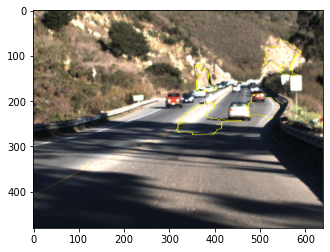

In [201]:
plt.imshow(mark_boundaries(temp, mask))
plt.savefig('C:/Users/Ketan/Thesis/self-driving-car/challenges/explanations_resized/LIME/1479425719681268780.jpg', dpi=300)

In [47]:
temp, mask = explanations.get_image_and_mask(explanations.top_labels[0], positive_only=True, num_features=5, hide_rest=False)


In [1]:
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))


NameError: name 'plt' is not defined

In [ ]:
from skimage.segmentation import mark_boundaries

plt.figure(1, plt.figure(figsize=(100,100)))
index = 0
for explanation in explanations:
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
    plt.subplot(20, 20, 1 + index)
    plt.imshow(mark_boundaries(temp, mask))
    index = index + 1
plt.show()